# Environment Setup

**Check House Price Data file**

In [61]:
ls houseprices_full

best_mlp_1.h5*                      test.csv*
best_mlp_2.h5*                      train.csv*
best_mlp_3.h5*                      train_proc.csv
best_mlp_4.h5*                      train_proc_lg.csv
best_models_1_scaled/               validation_proc.csv
houseprices_full_best_models_2.zip  validation_proc_lg.csv


In [62]:
!pip freeze

absl-py==0.2.0
alabaster==0.7.10
anaconda-client==1.6.9
anaconda-navigator==1.7.0
anaconda-project==0.8.2
appnope==0.1.0
appscript==1.0.1
asn1crypto==0.24.0
astor==0.6.2
astroid==1.6.1
astropy==2.0.3
attrs==17.4.0
Babel==2.5.3
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.0
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==1.5.0
bokeh==0.12.13
boto==2.48.0
Bottleneck==1.2.1
certifi==2018.1.18
cffi==1.11.4
chardet==3.0.4
click==6.7
cloudpickle==0.5.2
clyent==1.2.2
colorama==0.3.9
conda==4.4.10
conda-build==3.4.1
conda-verify==2.0.0
contextlib2==0.5.5
cryptography==2.1.4
cycler==0.10.0
Cython==0.27.3
cytoolz==0.9.0
dask==0.16.1
datashape==0.5.4
decorator==4.2.1
distributed==1.20.2
docutils==0.14
entrypoints==0.2.3
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==2.0.13
Flask==0.12.2
Flask-Cors==3.0.3
future==0.16.0
gast==0.2.0
gevent==1.2.2
glob2==0.6
gmpy2==2.0.8
graphviz==0.5.1
greenlet==0.4.12
grpcio==1.11.0
h5py==2.7.1
heapdict==1.0.0
html5lib==0.9999999
idna==2.6
image

# Project Setup

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

from scipy import stats
from scipy.stats import zscore
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy.stats import norm

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import keras
from keras.models import Sequential
from keras.layers import Average, Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model, Input
from keras.callbacks import EarlyStopping

# Data Preprocessing

## Raw data analysis

### Declarations

In [64]:
def load_data():
  data_train = pd.read_csv('houseprices_full/train.csv')
  data_test = pd.read_csv('houseprices_full/test.csv')
  all_data = pd.concat((data_train.loc[:,'MSSubClass':'SaleCondition'],
                      data_test.loc[:,'MSSubClass':'SaleCondition']))
  all_result = pd.concat((data_train.loc[:, 'SalePrice'],
                         data_test.loc[:, 'SalePrice']))
  return (data_train, data_test, all_data, all_result)

In [65]:
def export_lg_data():
    combined_data = pd.concat((data_train.loc[:,'MSSubClass':'SaleCondition'],
                      data_test.loc[:,'MSSubClass':'SaleCondition']))
    combined_result = pd.concat((data_train.loc[:, 'SalePrice'],
                         data_test.loc[:, 'SalePrice']))
    
    data_tr, data_val, result_tr, result_val = train_test_split(combined_data, combined_result, random_state = 3)
    data_tr=pd.concat([data_tr, np.log1p(result_tr)], axis=1)
    data_tr.to_csv('houseprices_full/train_proc_lg.csv', sep=',')

    data_val=pd.concat([data_val, np.log1p(result_val)], axis=1)
    data_tr.to_csv('houseprices_full/validation_proc_lg.csv', sep=',')

In [66]:
#export_lg_data()

### Flow

In [67]:
data_train, data_test, all_data, all_result = load_data()
print(data_train.axes)
print(data_test.axes)

[RangeIndex(start=0, stop=1460, step=1), Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'Gara

In [68]:
print(data_train.shape)
print(data_test.shape)

(1460, 81)
(1459, 81)


In [69]:
print(data_train['MSSubClass'].describe())
print(data_train['MSSubClass'].unique())

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22b46518>,
      dtype=object)

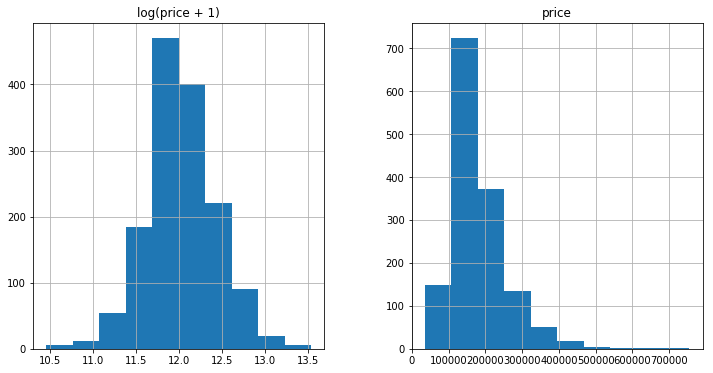

In [70]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":data_train["SalePrice"], "log(price + 1)":np.log1p(data_train["SalePrice"])})
prices.hist()

## Impute data

### Declarations

In [71]:
def check_data_missing_ratio(all_data):
  all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
  all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
  print(missing_data.head())

In [72]:
def fill_na_simple(all_data):
  all_data = pd.get_dummies(all_data)
  all_data = all_data.fillna(all_data.mean())
  return all_data

In [73]:
def fill_na_data_by_type(all_data):
  all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
  all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
  all_data["Alley"] = all_data["Alley"].fillna("None")
  all_data["Fence"] = all_data["Fence"].fillna("None")
  all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
  all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
  for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
      all_data[col] = all_data[col].fillna('None')
  for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
      all_data[col] = all_data[col].fillna(0)
  for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
      all_data[col] = all_data[col].fillna(0)
  for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
      all_data[col] = all_data[col].fillna('None')
  all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
  all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
  all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
  all_data = all_data.drop(['Utilities'], axis=1)
  all_data["Functional"] = all_data["Functional"].fillna("Typ")
  all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
  all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
  all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
  all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
  all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
  all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [74]:
def mark_col_categorical(all_data):
  #MSSubClass =The building class
  all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

  #Changing OverallCond into a categorical variable
  all_data['OverallCond'] = all_data['OverallCond'].astype(str)

  #Year and month sold are transformed into categorical features.
  all_data['YrSold'] = all_data['YrSold'].astype(str)
  all_data['MoSold'] = all_data['MoSold'].astype(str)

In [75]:
def label_cat_features(all_data):
  from sklearn.preprocessing import LabelEncoder
  cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
          'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
          'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
          'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
          'YrSold', 'MoSold')
  # Process columns and apply LabelEncoder to categorical features
  for c in cols:
      lbl = LabelEncoder() 
      lbl.fit(list(all_data[c].values)) 
      all_data[c] = lbl.transform(list(all_data[c].values))

In [76]:
def create_compound_feature(all_data):
  # Adding Total Square Feet feature 
  all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [77]:
def check_skewness(all_data):
  numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

  # Check the skew of all numerical features
  skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
  skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
  print(skewness.head())

In [78]:
def skew_data_set(all_data, normal_skew):
  numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

  # Check the skew of all numerical features
  skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
  skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
  
  # Only perform BC transformation on data set having large skewness
  skewness = skewness[abs(skewness) > normal_skew]
  print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

  from scipy.special import boxcox1p
  skewed_features = skewness.index
  lam = 0.15
  for feat in skewed_features:
      all_data[feat] = boxcox1p(all_data[feat], lam)
      all_data[feat] += 1

In [79]:
def plot_distribution(data_train):
  #Check the new distribution 
  sns.distplot(data_train['SalePrice'] , fit=norm);

  # Get the fitted parameters used by the function
  (mu, sigma) = norm.fit(data_train['SalePrice'])
  print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
              loc='best')
  plt.ylabel('Frequency')
  plt.title('SalePrice distribution')

  fig = plt.figure()
  res = stats.probplot(data_train['SalePrice'], plot=plt)
  plt.show()

  print("Skewness: %f" % data_train['SalePrice'].skew())
  print("Kurtosis: %f" % data_train['SalePrice'].kurt())

### Flow

In [80]:
simple_fill=True

print("===Before filling===")
check_data_missing_ratio(all_data)

if(simple_fill):
  all_data=fill_na_simple(all_data)
else:
  fill_na_data_by_type(all_data)

print("\n===After filling===")
check_data_missing_ratio(all_data)

===Before filling===
             Missing Ratio
PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
FireplaceQu      48.646797

===After filling===
Empty DataFrame
Columns: [Missing Ratio]
Index: []


In [81]:
print(all_data['MSSubClass'].describe())
print(all_data['MSSubClass'].unique())

count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]


In [82]:
if(not simple_fill):
  mark_col_categorical(all_data)
  label_cat_features(all_data)
  create_compound_feature(all_data)

# Check shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 288)


In [83]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
all_result = np.log1p(all_result)

In [84]:
print("===Before BCTransform===")
check_skewness(all_data)

skew_data_set(all_data, 0.75)

print("\n===After BCTransform===")
check_skewness(all_data)

===Before BCTransform===
                     Skewed Features
Condition2_RRAn            54.000003
Exterior1st_ImStucc        54.000003
RoofMatl_Membran           54.000003
MiscFeature_TenC           54.000003
Condition2_RRAe            54.000003
There are 288 skewed numerical features to Box Cox transform

===After BCTransform===
                     Skewed Features
Condition2_RRAn            54.000003
RoofMatl_Membran           54.000003
Exterior1st_ImStucc        54.000003
Condition2_RRAe            54.000003
MiscFeature_TenC           54.000003


In [85]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 288)


## Prepare training and validation data

In [86]:
X_tr, X_val, y_tr, y_val = train_test_split(all_data, all_result, random_state = 3)

In [87]:
print(X_tr.shape)
print(X_val.shape)
print(y_tr.iloc[0])
print(y_val.iloc[0])

(2189, 288)
(730, 288)
11.997393966082265
11.970041217408847


In [88]:
def export_final_data():
    data_tr=pd.concat([X_tr, y_tr], axis=1)
    data_tr.to_csv('houseprices_full/train_proc.csv', sep=',')

    data_val=pd.concat([X_val, y_val], axis=1)
    data_tr.to_csv('houseprices_full/validation_proc.csv', sep=',')

In [89]:
#export_final_data()

# NN Models

## Declarations

In [90]:
# Regression chart.
def chart_regression(predArray,y,sort=True):
    t = pd.DataFrame({'pred' : predArray, 'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [91]:
def chart_score(results):
    t = pd.DataFrame({'rmse_tr' : results['rmse_tr'], 'rmse_val' : results['rmse_val']})
    a = plt.plot(t['rmse_val'].tolist(),label='RMSE Validation')
    b = plt.plot(t['rmse_tr'].tolist(),label='RMSE Training')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
    t = pd.DataFrame({'r2_tr' : results['r2_tr'], 'r2_val' : results['r2_val']})
    a = plt.plot(t['r2_val'].tolist(),label='R2 Validation')
    b = plt.plot(t['r2_tr'].tolist(),label='R2 Training')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [92]:
def chart_epoch(results):
    t = pd.DataFrame({'stopped_epoch' : results['stopped_epoch']})
    a = plt.plot(t['stopped_epoch'].tolist(),label='Stopped epoch')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [93]:
# Regression chart.
def chart_single(y,sort=True):
    t = pd.DataFrame({'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [94]:
def prediction_report(predArray, X_data, y_data):
  #Fill Nan cell with 0
  pred_fill=pd.Series(predArray)
  pred_fill=pred_fill.fillna(0)
    
  #RMSE score
  score = np.sqrt(metrics.mean_squared_error(pred_fill,y_data))
  print("Score (RMSE): {}".format(score))

  #R2 score  
  score_r2 = r2_score(y_data, pred_fill)
  print("Score (R2): {}".format(score_r2))

  chart_regression(predArray,y_data)
  chart_regression(predArray,y_data,False)

In [95]:
def caculate_score(predArray, y_data):
  #Fill Nan cell with 0
  pred_fill=pd.Series(predArray)
  pred_fill=pred_fill.fillna(0)

  #RMSE score
  score = np.sqrt(metrics.mean_squared_error(pred_fill,y_data))
  #print("Score (RMSE): {}".format(score))

  #R2 score  
  score_r2 = r2_score(y_data, pred_fill)
  #print("Score (R2): {}".format(score_r2))
  return score, score_r2

## GRNN

** Chracteristic **

In [96]:
from neupy import algorithms, estimators, environment
from neupy import storage
from neupy.algorithms import GRNN as grnn

In [97]:
def run_grnnet(std):
    grnnet = algorithms.GRNN(std=std, verbose=False)
    grnnet.train(X_tr, y_tr)

    pred_grnn_tr = grnnet.predict(X_tr)
    score_tr, score_r2_tr = caculate_score(pred_grnn_tr[:,0], y_tr)

    pred_grnn_val = grnnet.predict(X_val)
    score_val, score_r2_val = caculate_score(pred_grnn_val[:,0], y_val)

    result = pd.DataFrame([[std, score_tr, score_r2_tr, score_val, score_r2_val]],\
                      columns=['std', 'rmse_tr', 'r2_tr', 'rmse_val', 'r2_val'])
    return grnnet, result

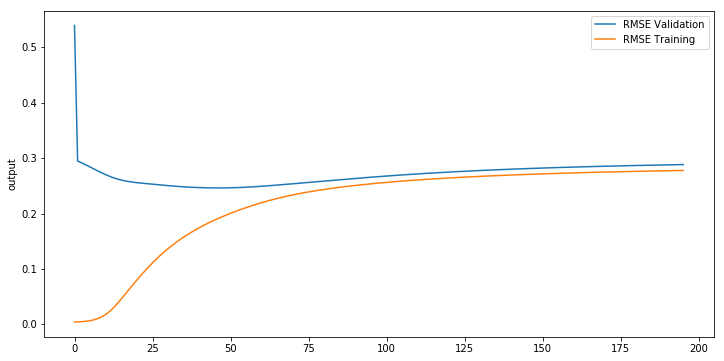

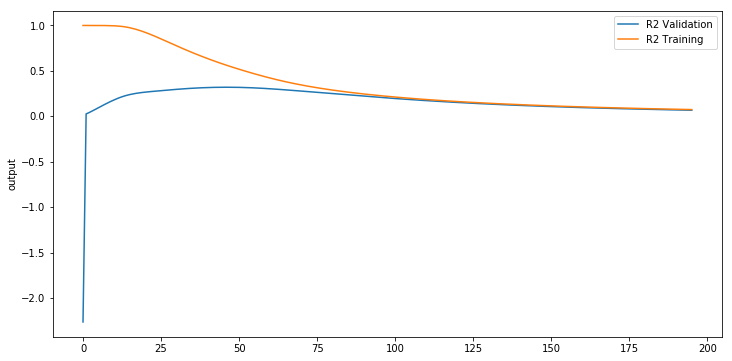

In [98]:
results_grnn=pd.DataFrame(columns=['std', 'rmse_tr', 'r2_tr', 'rmse_val', 'r2_val'])
rmse_grnn_val_min=1

for std in np.arange(0.5, 20.1, 0.1):
    grnnet, result = run_grnnet(std)
    results_grnn = results_grnn.append(result, ignore_index=True)
    if(result['rmse_val'].iat[0] < rmse_grnn_val_min):
        best_grnn=grnnet
        rmse_grnn_val_min=result['rmse_val'].iat[0]

chart_score(results_grnn)

In [99]:
print(results_grnn.describe())

              std     rmse_tr       r2_tr    rmse_val      r2_val
count  196.000000  196.000000  196.000000  196.000000  196.000000
mean    10.250000    0.217742    0.357206    0.270133    0.175277
std      5.672448    0.078917    0.303040    0.024202    0.195679
min      0.500000    0.004396    0.073984    0.246280   -2.263844
25%      5.375000    0.197751    0.119381    0.254564    0.104187
50%     10.250000    0.255129    0.219513    0.270758    0.178024
75%     15.125000    0.271001    0.531084    0.282657    0.273408
max     20.000000    0.277899    0.999768    0.539530    0.319926


** Highlights **

In [100]:
def run_single_grnnet(std):
    grnnet = algorithms.GRNN(std=std, verbose=True)
    grnnet.train(X_tr, y_tr)
    pred_grnn_tr = grnnet.predict(X_tr)
    prediction_report(pred_grnn_tr[:,0], X_tr, y_tr)
    pred_grnn_val = grnnet.predict(X_val)
    prediction_report(pred_grnn_val[:,0], X_val, y_val)


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.5

Score (RMSE): 0.004395913304093346
Score (R2): 0.9997682905285257


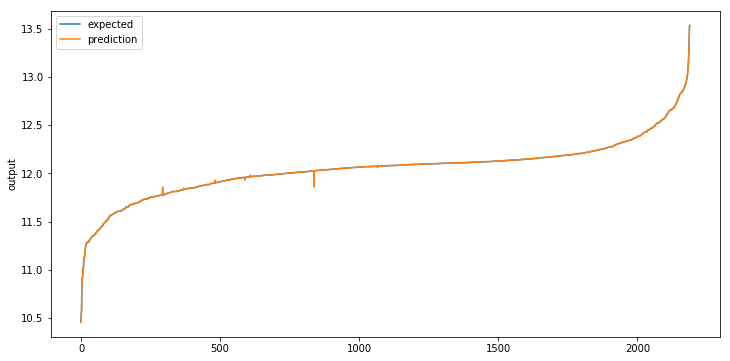

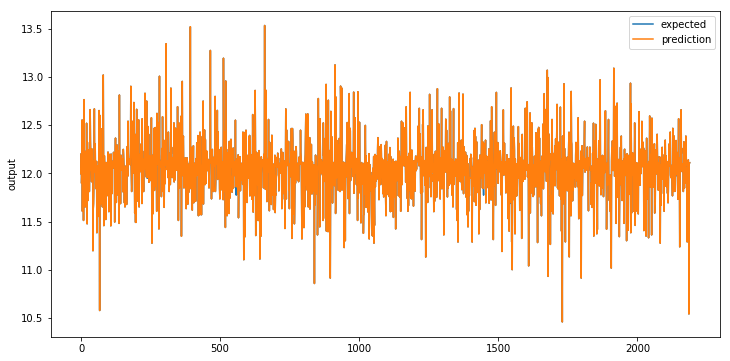

Score (RMSE): 0.5395302501550051
Score (R2): -2.263843800667334


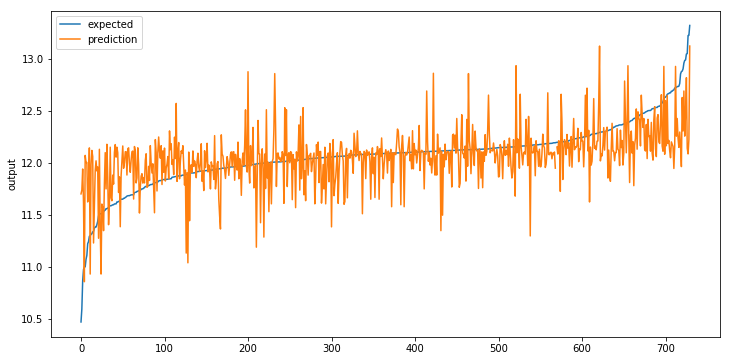

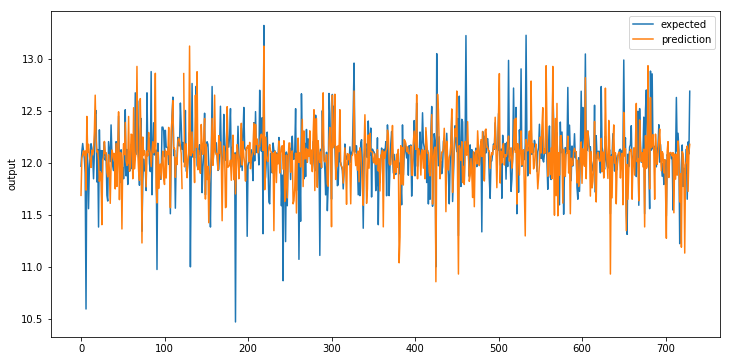

In [101]:
run_single_grnnet(0.5)


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 5.1

Score (RMSE): 0.19121351814453078
Score (R2): 0.5615876965774635


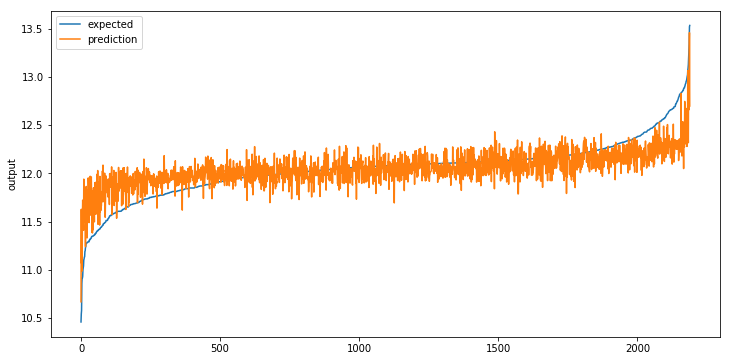

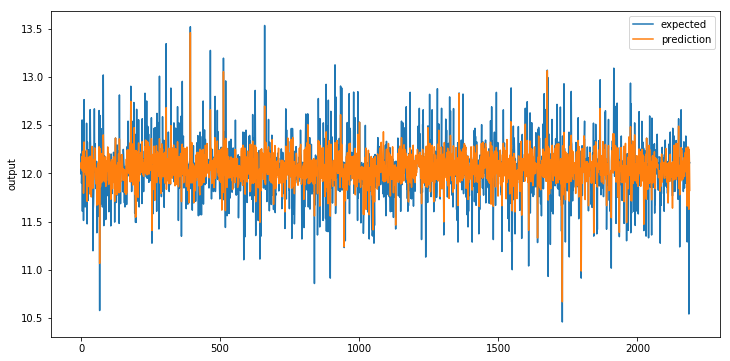

Score (RMSE): 0.2462800888807021
Score (R2): 0.31992568842688884


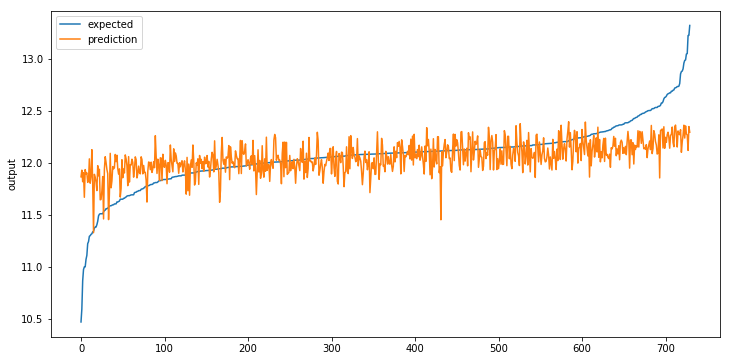

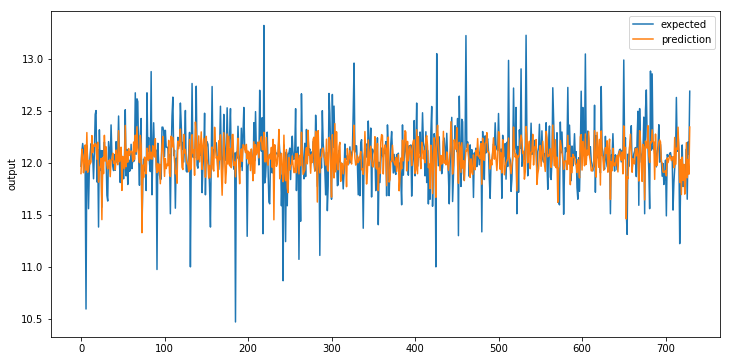

In [102]:
run_single_grnnet(5.1)


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 20

Score (RMSE): 0.27789866452758877
Score (R2): 0.0739840468736297


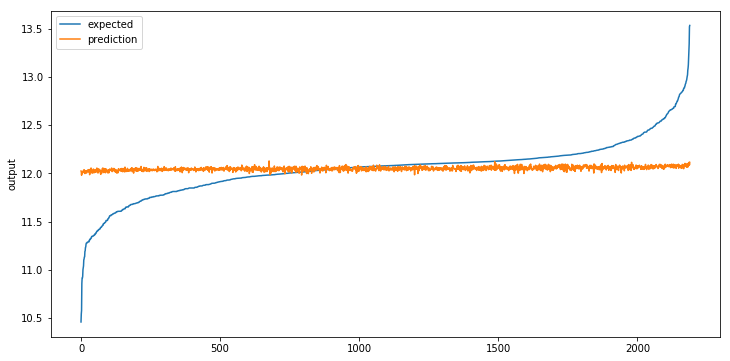

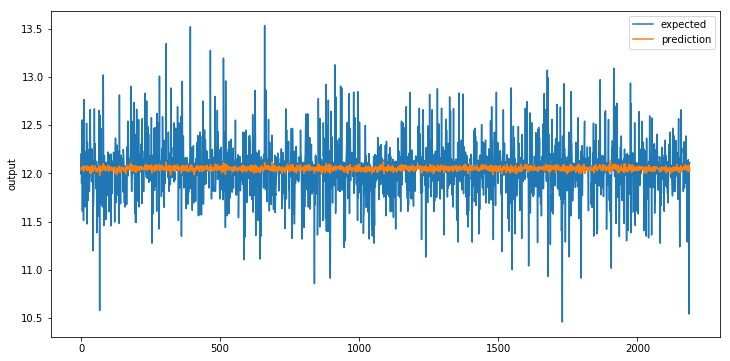

Score (RMSE): 0.28849050601421894
Score (R2): 0.06682989315886101


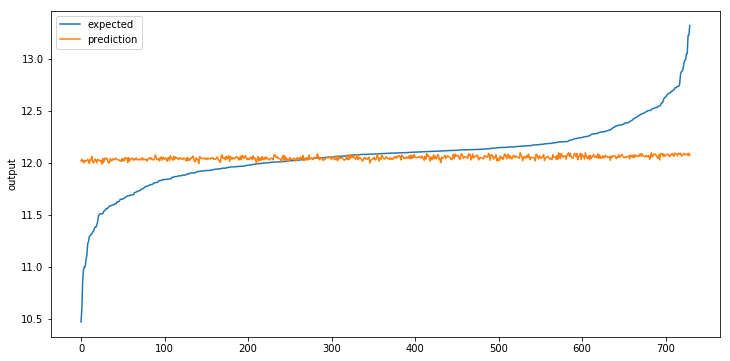

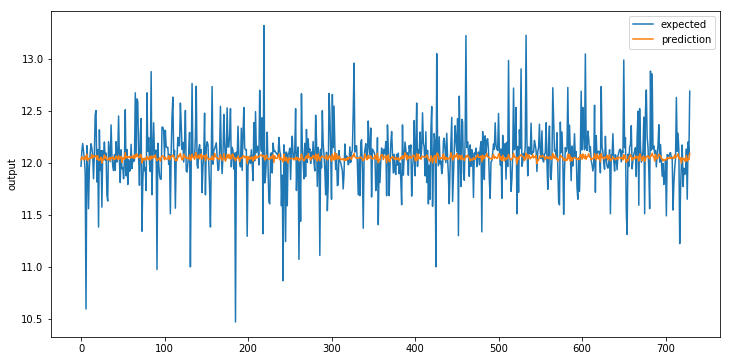

In [103]:
run_single_grnnet(20)

# Save Models

In [104]:
print(best_grnn)

GRNN(verbose=False, step=None, show_epoch=None, shuffle_data=None, epoch_end_signal=None, train_end_signal=None, std=5.099999999999999)
